In [565]:
import h5py
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [566]:
file_predictions = 'predictions.txt'
train_file = 'MA0035_4_m5_train.h5'
test_file = 'MA0035_4_m5_test.h5'

In [567]:
h5_train = h5py.File(train_file, 'r')
h5_test = h5py.File(test_file, 'r')

In [568]:
train_data = h5_train['data']
train_binlabels = h5_train['binlabels']

print(train_data.shape)

train_data = train_data[:20000]
train_binlabels = train_binlabels[:20000]

val_data = h5_test['data'][:]
# val_data = np.ndarray.flatten(val_data)
val_binlabels = h5_test['binlabels'][:]

(100000, 4, 1000)


In [569]:
train_data.shape

(20000, 4, 1000)

In [570]:
val_data.shape

(10000, 4, 1000)

In [571]:
print(train_data.shape)
print(train_binlabels.shape)
print(train_data[0])
print(train_binlabels[0])

(20000, 4, 1000)
(20000, 1)
[[0 1 1 ... 0 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]]
[0]


In [572]:
# model = tf.keras.models.Sequential(
#     [
#         tf.keras.layers.Flatten(input_shape=(4, 1000)),
#         tf.keras.layers.Dense(512, activation=tf.keras.activations.relu),
#         tf.keras.layers.Dense(512, activation=tf.keras.activations.relu),
#         tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
#         tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
#     ]
# )

In [573]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(4, 1000)),
        tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [574]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss = 'binary_crossentropy',
    # metrics=['accuracy', tf.keras.metrics.AUC()]
    metrics=[tf.keras.metrics.AUC()]
)



In [575]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_37 (Flatten)         (None, 4000)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 16)                64016     
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 17        
Total params: 64,033
Trainable params: 64,033
Non-trainable params: 0
_________________________________________________________________


In [576]:
# history = model.fit(train_data, train_binlabels, epochs=100, validation_data=(val_data, val_binlabels), batch_size=50)
history = model.fit(train_data, 
            train_binlabels,
            epochs=30, 
            validation_data=(val_data, val_binlabels))


Epoch 1/30
625/625 [==============================] - 2s 2ms/step - loss: 0.6338 - auc_15: 0.5056 - val_loss: 0.5745 - val_auc_15: 0.5063
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 0.6142 - auc_15: 0.5949 - val_loss: 0.5952 - val_auc_15: 0.5005
Epoch 3/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5897 - auc_15: 0.6600 - val_loss: 0.5905 - val_auc_15: 0.5028
Epoch 4/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5697 - auc_15: 0.7020 - val_loss: 0.6043 - val_auc_15: 0.5022
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5641 - auc_15: 0.7061 - val_loss: 0.6128 - val_auc_15: 0.5023
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5566 - auc_15: 0.7259 - val_loss: 0.6110 - val_auc_15: 0.5033
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 0.5496 - auc_15: 0.7311 - val_loss: 0.6306 - val_auc_15: 0.5030
Epoch 8/30
625/625 [==============

KeyboardInterrupt: 

In [554]:
test_data = train_data[-10000:][:]
test_binlabels = train_binlabels[-10000:][:]

In [555]:
# acc, auc = model.evaluate(test_data)

In [556]:
yhat = model.predict(test_data)

In [557]:
yhat[1]

array([4.2578754e-06], dtype=float32)

In [558]:
test_binlabels[1]

array([0], dtype=int8)

In [559]:
fpr, tpr, _ = roc_curve(test_binlabels, yhat)

In [560]:
roc_auc = roc_auc_score(test_binlabels, yhat)

In [561]:
roc_auc

0.9984809524031754

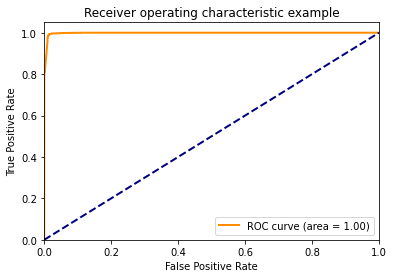

In [562]:
# plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()